In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader

from datetime import datetime

from __future__ import division

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)

In [3]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,137.892334,135.159682,136.504981,136.593849,8.982748e+07,136.142888
std,10.854368,10.877661,10.827827,10.900506,2.876140e+07,11.059421
min,117.489998,116.209999,116.570000,116.360001,4.100000e+07,115.819870
25%,128.142502,125.940002,127.004997,127.049999,6.937820e+07,126.513035
50%,135.650002,133.454994,134.885002,134.464996,8.525580e+07,133.840836
75%,147.802494,145.577499,146.352505,146.587502,1.048418e+08,146.336533
max,165.699997,161.000000,161.679993,161.940002,1.925415e+08,161.940002


In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-11-27 to 2021-11-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


HISTORICAL VIEW OF THE CLOSING PRICE

<AxesSubplot:xlabel='Date'>

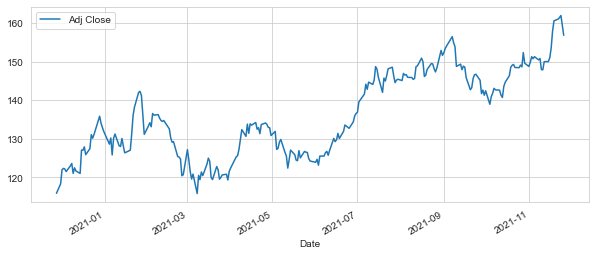

In [6]:
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))

TOTAL VOLUME OF STOCK BEING TRADED EACH DAY OVER THE PREVIOUS YEAR

<AxesSubplot:xlabel='Date'>

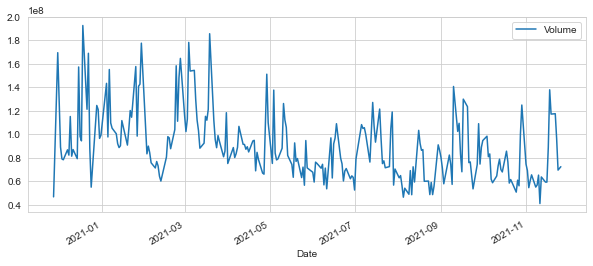

In [7]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

MOVING AVERAGES

In [8]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,243.000000,233.000000,203.000000
mean,137.892334,135.159682,136.504981,136.593849,8.982748e+07,136.142888,136.016139,135.937477,135.521009
std,10.854368,10.877661,10.827827,10.900506,2.876140e+07,11.059421,10.275706,9.723635,8.701953
min,117.489998,116.209999,116.570000,116.360001,4.100000e+07,115.819870,120.615507,120.835480,125.726872
25%,128.142502,125.940002,127.004997,127.049999,6.937820e+07,126.513035,126.694772,127.684067,127.943045
50%,135.650002,133.454994,134.885002,134.464996,8.525580e+07,133.840836,133.287482,132.553833,131.091669
75%,147.802494,145.577499,146.352505,146.587502,1.048418e+08,146.336533,146.090530,145.987438,146.906200
max,165.699997,161.000000,161.679993,161.940002,1.925415e+08,161.940002,156.408002,153.126762,148.137497


<AxesSubplot:xlabel='Date'>

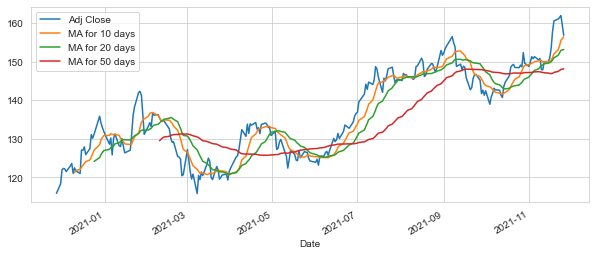

In [10]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

DAILY RETURN ANALYSIS

<AxesSubplot:xlabel='Date'>

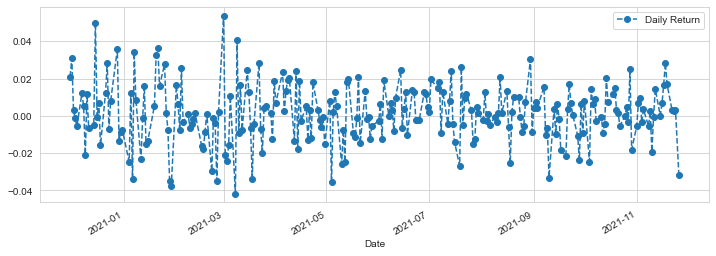

In [11]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (12,4),legend=True,linestyle = '--',marker = 'o')

AVERAGE DAILY RETURN USING A HISTOGRAM

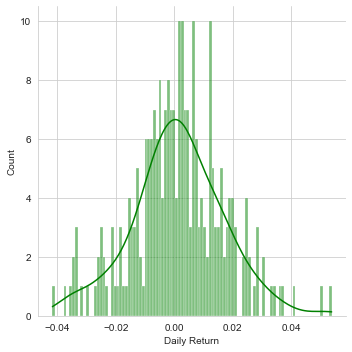

In [12]:
sns.displot(AAPL['Daily Return'].dropna(),bins = 100, kde= True, color='green')

BUILDING A DATAFRAME WITH ALL ['Close'] COLUMNS FOR EACH STOCKS DATAFRAMES

In [13]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [14]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-27,115.875641,1793.189941,213.440872,3195.340088
2020-11-30,118.320580,1760.739990,212.290512,3168.040039
2020-12-01,121.968102,1798.099976,214.412735,3220.080078
2020-12-02,122.325890,1827.949951,213.579712,3203.530029
2020-12-03,122.186752,1826.770020,212.459106,3186.729980


DAILY RETURNS FOR ALL STOCKS THIS TIME

In [15]:
tech_rets = closing_df.pct_change()

In [16]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-27,NaN,NaN,NaN,NaN
2020-11-30,0.021100,-0.018096,-0.005390,-0.008544
2020-12-01,0.030827,0.021218,0.009997,0.016427
2020-12-02,0.002933,0.016601,-0.003885,-0.005140
2020-12-03,-0.001137,-0.000645,-0.005247,-0.005244


COMPARING THE DAILY PCT OF A STOCK TO ITSELF (OBVIOUSLY, PERFECT CORRELATION IS EXPECTED)

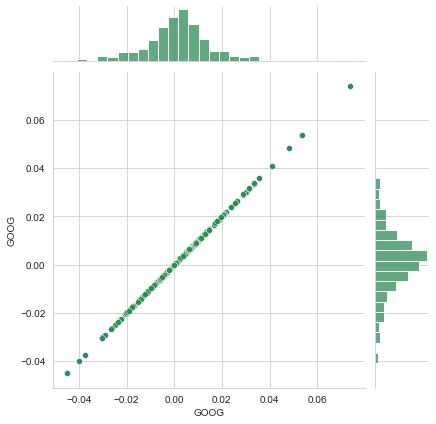

In [17]:
sns.jointplot(x='GOOG',y='GOOG', data= tech_rets,kind='scatter', color = 'seagreen')

GOOG VS MSFT

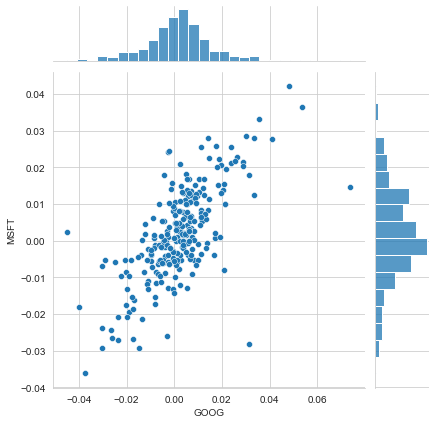

In [18]:
sns.jointplot(x='GOOG',y='MSFT', data= tech_rets,  kind='scatter')

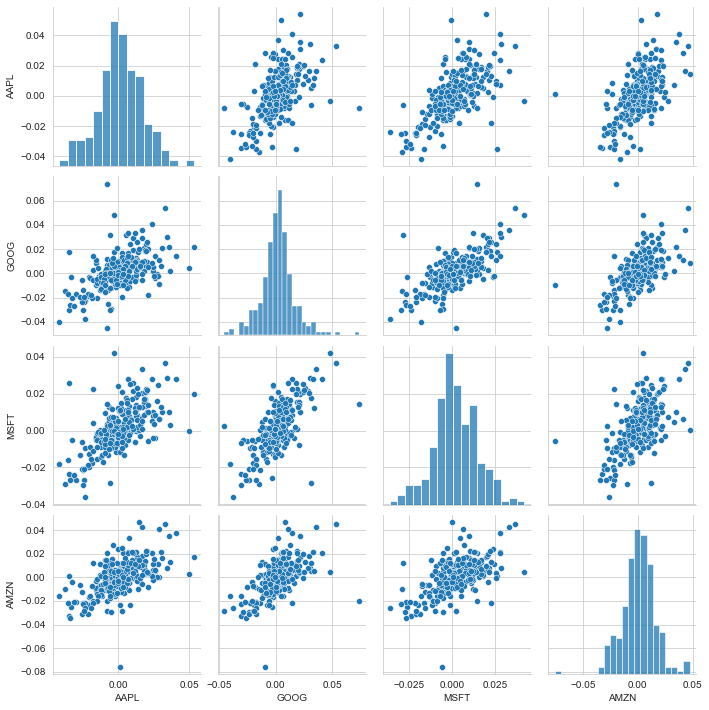

In [19]:
sns.pairplot(tech_rets.dropna())

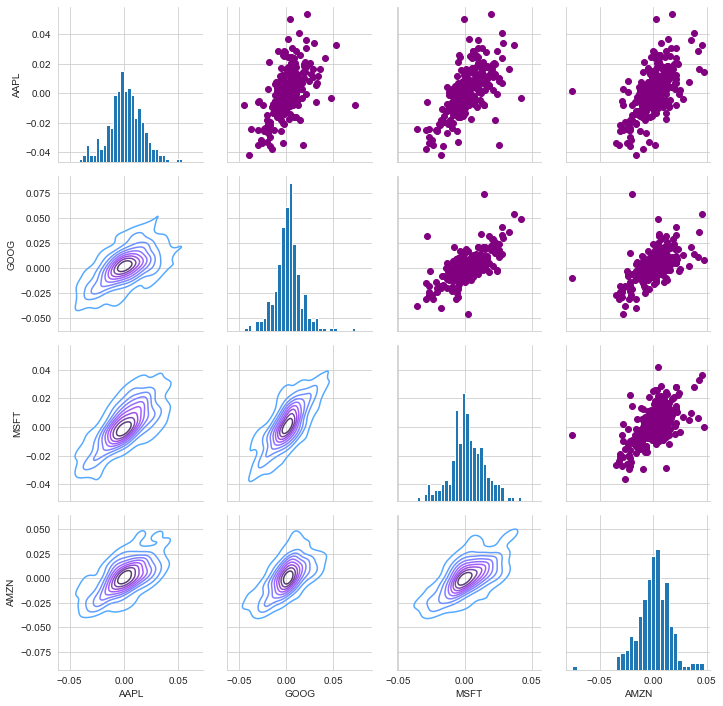

In [20]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

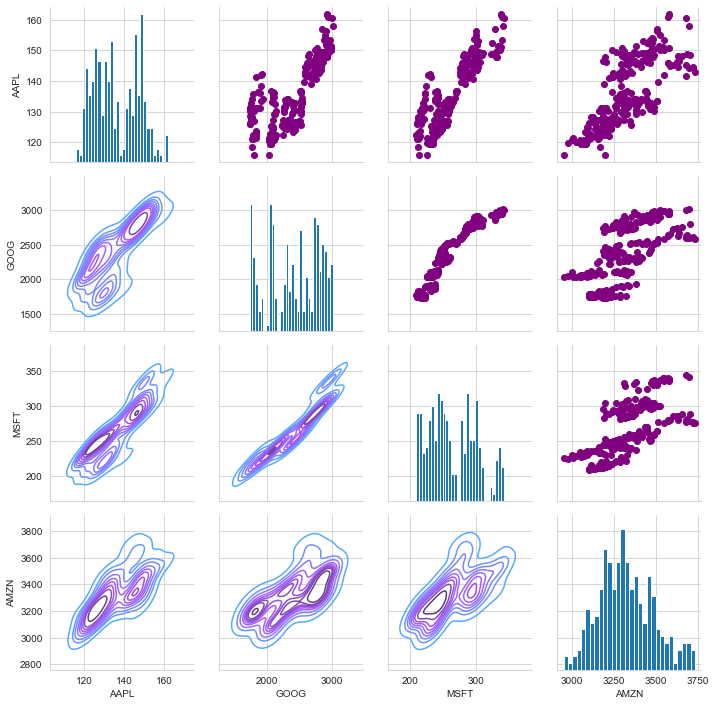

In [21]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

CORRELATION PLOT FOR THE DAILY RETURNS

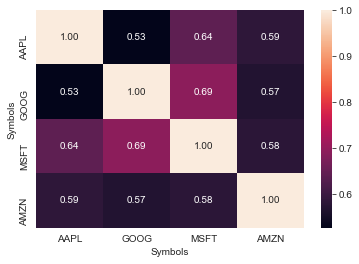

In [22]:
tech_rets_corr= tech_rets.dropna().corr()
tech_rets_corr_fig = sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')

RISK ANALYSIS

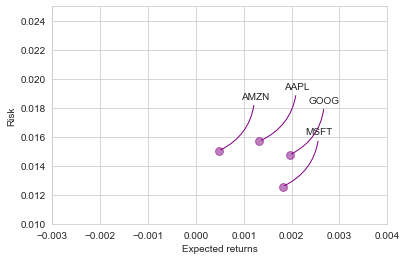

In [32]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha = 0.5, s = area, color = 'purple')

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color = 'purple'))